In [292]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.insert(0, '/home/knight/matar/PYTHON/ECOGpy/pacpy')
sys.path.insert(0, '/home/knight/matar/PYTHON/ECOGpy/ecogtools')
sys.path.insert(0, '/home/knight/matar/PYTHON/ECOGpy/')

In [11]:
import os
import cPickle as pickle
import pandas as pd
from plotting.singletrials import plot_singletrials as plot_single
from plotting.traces import plot_trace
from plotting import brain
import scipy.io as spio
from utils.get_HGdata import get_HGdata

In [4]:
#cm = plt.get_cmap('RdGy_r')
#plot(np.arange(0,10), lw = 10, color = cm(1000))

In [5]:
base = '/home/knight/matar/MATLAB/DATA/Avgusta'


# heterogeneous in ROI

'/home/knight/matar/MATLAB/DATA/Avgusta/PCA/exit/GP15_SelfVis_e17_e10_e25_trace'

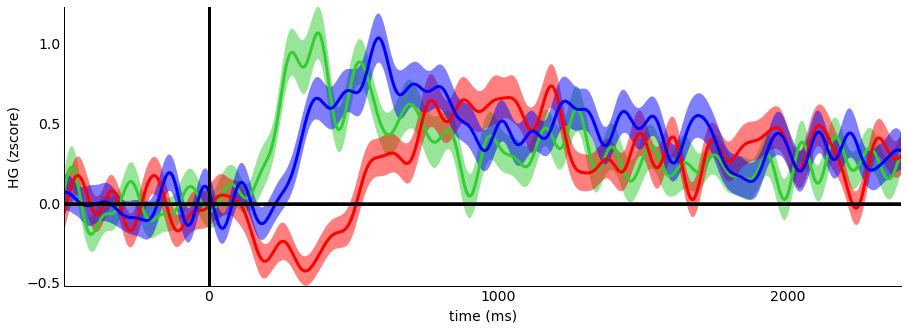

In [271]:
f, ax = plt.subplots(figsize = (15, 5))
elec_list = [17, 10, 25]
c = ['limegreen', 'red', 'blue']
subj, task = 'GP15', 'SelfVis'

for i, e in enumerate(elec_list):
    plot_trace(subj, task, [e], color = c[i], ax = ax)
    
# subj, task, elec_list = 'GP15','SelfVis', [17]

# subj, task, elec_list = 'GP15','SelfVis', [10]
# plot_trace(subj, task, elec_list, color = '#1b9e77', ax = ax) #green
# subj, task, elec_list = 'GP15','SelfVis', [25]
# plot_trace(subj, task, elec_list, color = '#d95f02', ax = ax) #orange

filename = os.path.join(base, 'PCA', 'exit', '_'.join([subj, task, 'e17_e10_e25_trace']))
plt.savefig(filename, dpi = 150)
filename

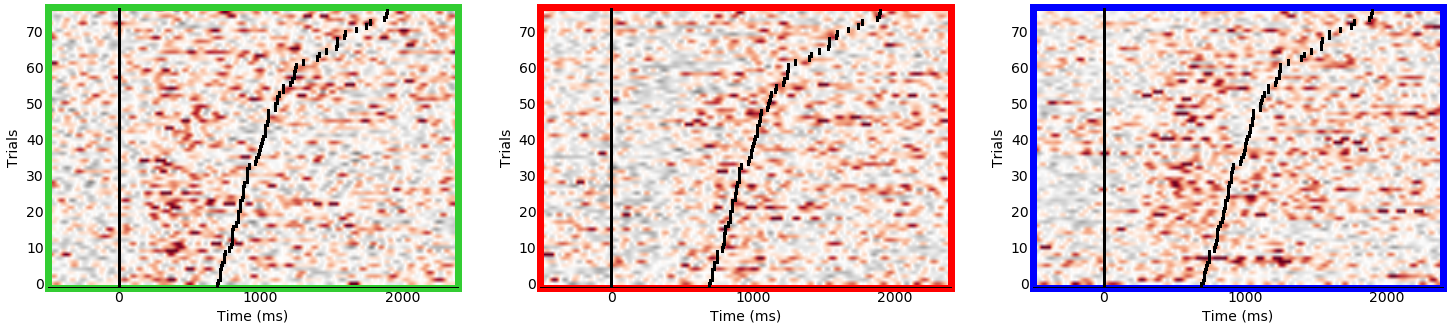

In [265]:
f, axs = plt.subplots(1,3, figsize = (25, 5))
subj, task, elec_list = 'GP15','SelfVis', [17]
ax = plot_single(subj, task, elec_list, smooth = True, cm = plt.get_cmap('RdGy_r'), ax = axs[0], cbar = False, vmin = -4, vmax = 4)

subj, task, elec_list = 'GP15','SelfVis', [10]
ax = plot_single(subj, task, elec_list, smooth = True, cm = plt.get_cmap('RdGy_r'), ax = axs[1], cbar = False, vmin = -4, vmax = 4)

subj, task, elec_list = 'GP15','SelfVis', [25]
ax = plot_single(subj, task, elec_list, smooth = True, cm = plt.get_cmap('RdGy_r'), ax = axs[2], cbar = False, vmin = -4, vmax = 4)

for i, ax in enumerate(axs):    
    autoAxis = axs[i].axis()
    rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False, lw=7, color = c[i])
    rec = axs[i].add_patch(rec)
    rec.set_clip_on(False)

filename = os.path.join(base, 'PCA', 'exit', '_'.join([subj, task, 'e17_e10_e25_single']))
plt.savefig(filename, dpi = 150)

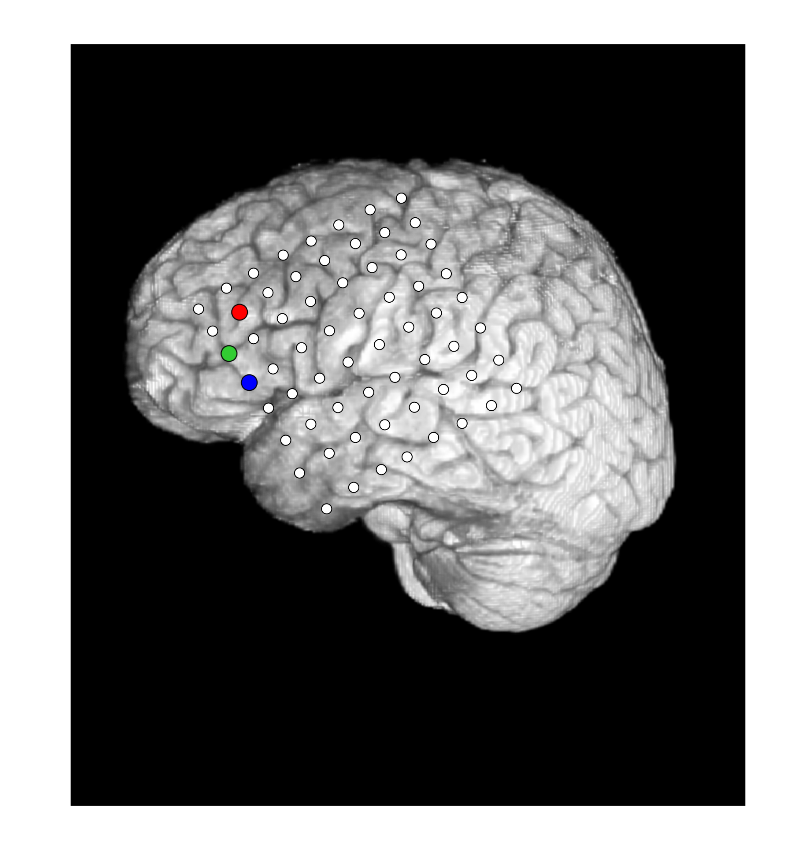

In [266]:
groupidx = pd.DataFrame({'cluster':[0,1,2]}, index = [17, 10, 25])
#create list of colors for scatter on brain
c = ['limegreen', 'red', 'blue']

#load xy coordinates for electrodes, format as dataframe
recon_path = os.path.join(base, 'Subjs', subj, subj+'_Lateral_Left_blankelecs.png')
xycoord_path = os.path.join(base, 'Subjs', subj, 'xycoords.p')
with open(xycoord_path, 'r') as f:
    xycoords = pickle.load(f)
    f.close()
xycoords = pd.DataFrame(np.array(xycoords.values()), columns=['x_2d', 'y_2d'], index=np.array(xycoords.keys())+1)

#plot brain with color-coded electrodes
brain.plot_xy_map(groupidx[['cluster']], locs = xycoords.loc[groupidx.index], colors = c, szmult=250, im_path = recon_path)    

filename = os.path.join(base, 'PCA', 'exit', '_'.join([subj, task, 'e17_e10_e25_brain']))
plt.savefig(filename, dpi = 150)

# stim, sust, resp activity

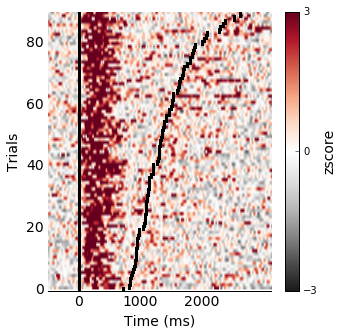

In [280]:
f, ax = plt.subplots(1,1, figsize = (5,5))
subj, task, elec_list = 'GP35','EmoGen', [21]
ax = plot_single(subj, task, elec_list, smooth = True, cm = plt.get_cmap('RdGy_r'), ax = ax, cbar = True)
filename = os.path.join(base, 'PCA', 'exit', '_'.join([subj, task, 'e21_single']))
plt.savefig(filename, dpi = 150)

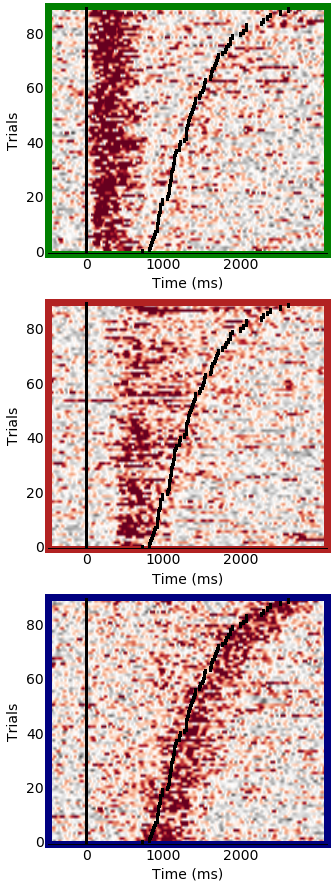

In [7]:
f, axs = plt.subplots(3,1, figsize = (5,15))
#c = ['limegreen', 'red', 'blue']
c = ['green','firebrick','navy']

subj, task, elec_list = 'GP35','EmoGen', [21]
ax = plot_single(subj, task, elec_list, smooth = True, cm = plt.get_cmap('RdGy_r'), ax = axs[0], cbar = False)

subj, task, elec_list = subj, task, [12]
ax = plot_single(subj, task, elec_list, smooth = True, cm = plt.get_cmap('RdGy_r'), ax = axs[1], cbar = False)

subj, task, elec_list = subj, task, [38]
ax = plot_single(subj, task, elec_list, smooth = True, cm = plt.get_cmap('RdGy_r'), ax = axs[2], cbar = False)

for i, ax in enumerate(axs):    
    autoAxis = axs[i].axis()
    rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.4,fill=False, lw=7, color = c[i])
    rec = axs[i].add_patch(rec)
    rec.set_clip_on(False)

filename = os.path.join(base, 'PCA', 'exit', '_'.join([subj, task, 'e21_e12_e38_single_dark']))
plt.savefig(filename, dpi = 150)

In [8]:
filename

'/home/knight/matar/MATLAB/DATA/Avgusta/PCA/exit/GP35_EmoGen_e21_e12_e38_single_dark'

/srv/local/anaconda-2.4.0/lib/python2.7/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


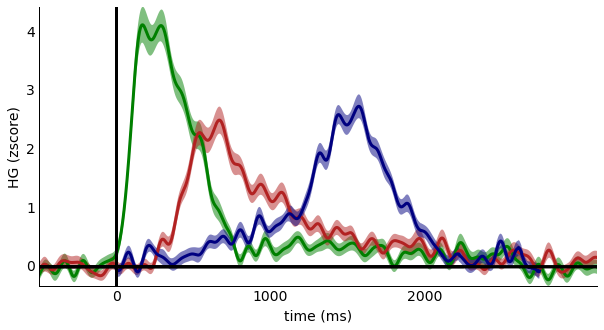

In [12]:
f, ax = plt.subplots(figsize = (10, 5))
c = ['green','firebrick','navy']

subj, task, elec_list = 'GP35','EmoGen', [21] #stim
plot_trace(subj, task, elec_list, color = c[0], ax = ax) 
subj, task, elec_list = subj, task, [12]
plot_trace(subj, task, elec_list, color = c[1], ax = ax) #dur

bl_st = -500
trials = pd.DataFrame()

#get data
var_list = ['srate','data_zscore','active_elecs', 'RTs'] #vars of interest
srate, alldata, active_elecs, RTs = get_HGdata(subj, task, var_list, type = 'zscore')
srate = np.float(srate)
resp_bl_st = np.mean(RTs)/1000.0*srate*-1

elec_list = [38]
idx = np.in1d(active_elecs, elec_list) #indices of these elecs in the HG dataframe
data = np.vstack(alldata[idx,:,:]) #trials x time for all elecs in cluster
RTs = np.tile(RTs, len(elec_list))

for i, r in enumerate(RTs):
    trials = trials.append(pd.DataFrame(data[i,r+500-RTs.mean():r+500+RTs.mean()]).transpose())
data = trials

#plot

ax.plot(np.arange(0, data.shape[1]), data.mean(axis = 0), zorder = 1, linewidth = 3, color = c[2])
sem = np.std(data, axis = 0)/np.sqrt(data.shape[0])
ax.fill_between(np.arange(0, data.shape[1]), data.mean(axis = 0)+sem, data.mean(axis=0)-sem, alpha = 0.5, zorder = 0, edgecolor = 'None', facecolor = c[2])
ax.plot(np.arange(bl_st, data.shape[1]+bl_st), np.zeros(data.shape[1]), color = 'k', linewidth = 3) #xaxis

filename = os.path.join(base, 'PCA', 'exit', '_'.join([subj, task, 'e21_e12_e38_trace_dark']))
plt.savefig(filename, dpi = 150)

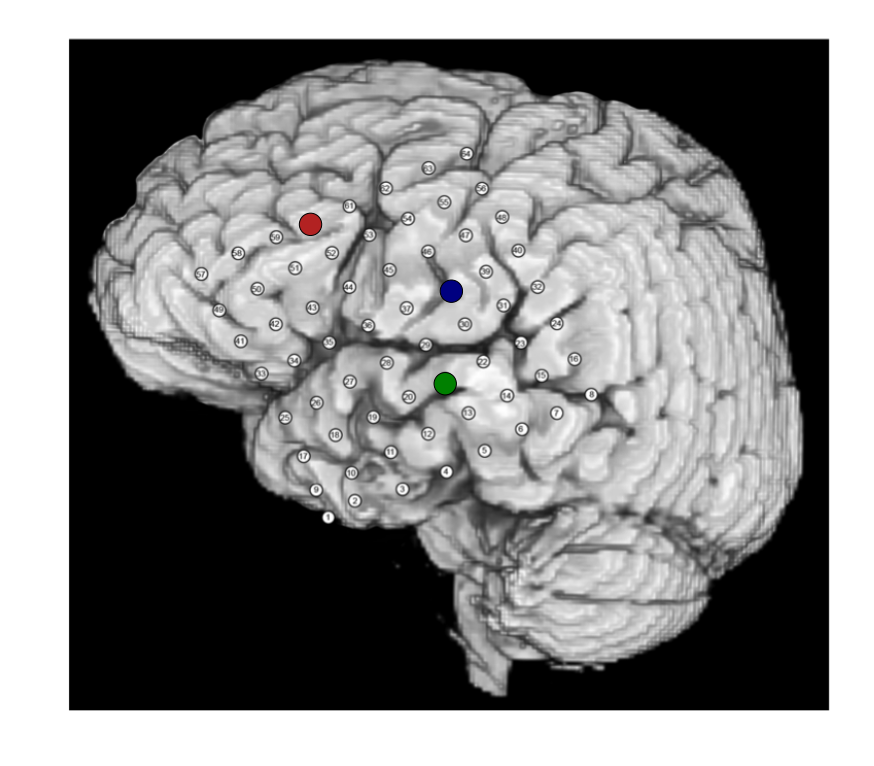

In [14]:
groupidx = pd.DataFrame({'cluster':[0,1,2]}, index = [21,12,38])
#create list of colors for scatter on brain
#c = ['#7570b3', '#d95f02', '#1b9e77', ]
#c = ['limegreen', 'red', 'blue']
c = ['green','firebrick','navy']
#load xy coordinates for electrodes, format as dataframe
base = '/home/knight/matar/MATLAB/DATA/Avgusta'
recon_path = os.path.join(base, 'Subjs', subj, subj+'_recon.png')
xycoord_path = os.path.join(base, 'Subjs', subj, 'xycoords_words.p')

with open(xycoord_path, 'r') as f:
    xycoords = pickle.load(f)
    f.close()
xycoords = pd.DataFrame(np.array(xycoords.values()), columns=['x_2d', 'y_2d'], index=np.array(xycoords.keys())+1)

#plot brain with color-coded electrodes
brain.plot_xy_map(groupidx[['cluster']], locs = xycoords.loc[groupidx.index], colors = c, szmult=500, im_path = recon_path)    

filename = os.path.join(base, 'PCA', 'exit', '_'.join([subj, task, 'e21_e12_e38_brain_dark']))
plt.savefig(filename, dpi = 150)

In [217]:
RTs.mean()

1373.911111111111

In [14]:
from utils.get_HGdata import get_HGdata

/srv/local/anaconda-2.4.0/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


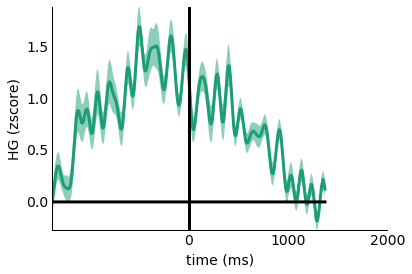

In [73]:
color = '#1b9e77'
trials = pd.DataFrame()
#get data
var_list = ['srate','data_zscore','active_elecs', 'RTs'] #vars of interest
srate, alldata, active_elecs, RTs = get_HGdata(subj, task, var_list)
srate = np.float(srate)
bl_st = np.mean(RTs)/1000.0*srate*-1

#get data for elecs of choice
idx = np.in1d(active_elecs, elec_list) #indices of these elecs in the HG dataframe
data = np.vstack(alldata[idx,:,:]) #trials x time for all elecs in cluster
RTs = np.tile(RTs, len(elec_list))

for i, r in enumerate(RTs):
    trials = trials.append(pd.DataFrame(data[i,r-np.abs(bl_st):r+np.abs(bl_st)]).transpose())
data = trials
    
f, ax = plt.subplots()
#plot
ax.plot(np.arange(bl_st, data.shape[1]+bl_st), data.mean(axis = 0), zorder = 1, linewidth = 3, color = color)
sem = np.std(data, axis = 0)/np.sqrt(data.shape[0])
ax.fill_between(np.arange(bl_st, data.shape[1]+bl_st), data.mean(axis = 0)+sem, data.mean(axis=0)-sem, alpha = 0.5, zorder = 0, edgecolor = 'None', facecolor = color)
ax.plot(np.arange(bl_st, data.shape[1]+bl_st), np.zeros(data.shape[1]), color = 'k', linewidth = 3) #xaxis
ax.axvline(0, color = 'k', linewidth = 3)
ax.set_ylabel('HG (zscore)', fontsize = 14)
ax.set_xlabel('time (ms)', fontsize = 14)
ax.autoscale(tight=True)
ax.set_xticks(np.arange(0, 3000, 1000))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.xaxis.set_tick_params(labelsize = 14, width = 0)
ax.yaxis.set_tick_params(labelsize = 14, width = 0)

In [69]:
bl_st*2

-2747.8222222222221

In [70]:
data.shape

(90, 2747)